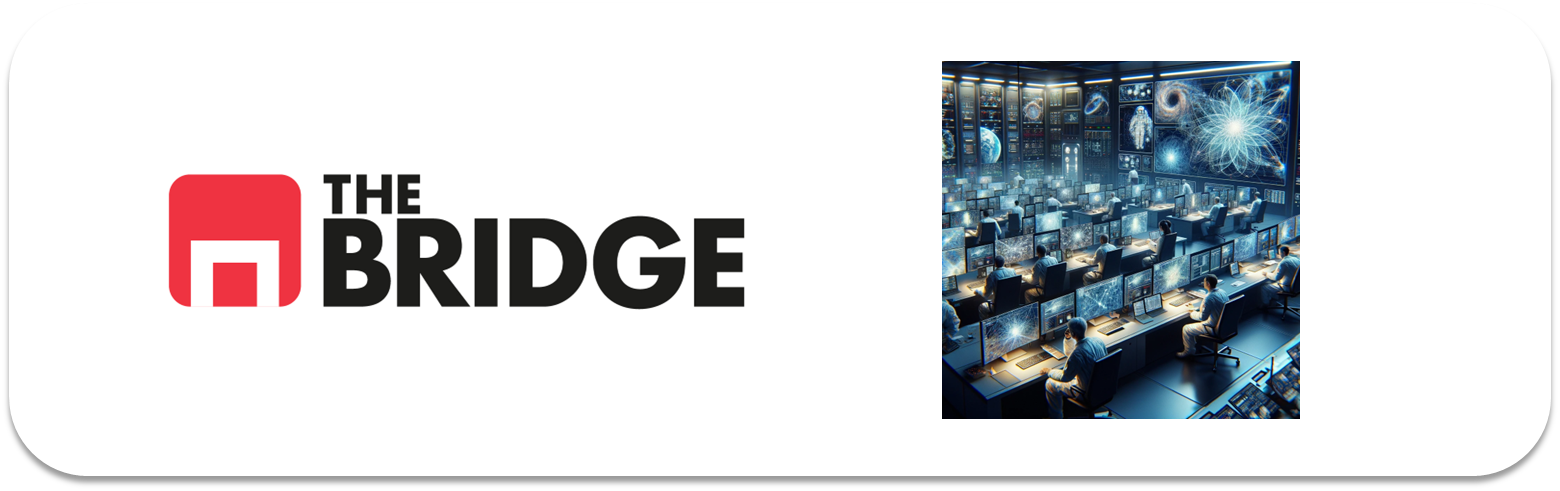

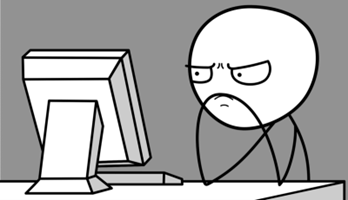

Para ejercitarte y afianzar lo aprendido sobre **Redes Convolucionales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [102]:
import bootcampviztools as bt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import cv2
from cv2 import imread
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# deep learning
from keras.models import Sequential # De aquí sacamos el tipo de modelo que vamos a construir, que sigue siendo una secuencia o cadena de capas consecutivas
from keras.layers import Conv2D # Esta es la capa para convolucionales con entrada de 2 dimensiones
from keras.layers import MaxPool2D # Esta es la clase que corresponde a las capas de Pooling que hacen maxpooling sobre datos de entrada en 2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Flatten, Dense
from keras.optimizers import Adam

# evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


## El problema de "Negocio"
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en https://www.kaggle.com/datasets/puneet6060/intel-image-classification?select=seg_test como `seg_train.zip` y `seg_test.zip` (o bien en el botón de download).  

NOTA: Son archivos bastante grandes (386MB en total). Por supuesto, no es necesario que tengas que mantenerlos en tu ordenador una vez realizado el ejercicio, bórralos si es el caso.




### Ejercicio 1

Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones). Para ello:

1. Descarga las imagenes del repositorio de Kaggle en el directorio que vayas a emplear para el ejercicio.
2. Descomprime los datos (son ficheros de imágenes) de forma que tengas dos subdirectorios seg_train y seg_test en el que estén ya colgando directamente los directorios de cada clase de paisajes. Si descargaste seg_pred, puedes eliminarlo.
3. Crea unas variables como las siguientes (ajustándolas a tu caso/rutas particulares):

```python
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"
```
4. Utiliza la siguiente función para crear los X_train, y_train y X_test e y_test:

```python
def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)
```


*Pues copiamos lo que nos dicen y lo aplicamos a los dos directorios para tener las X y las y*

In [103]:
root_path = './data/'

train_path = root_path + 'seg_train/'
test_path = root_path + 'seg_test/'

def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)

In [104]:
X_train, y_train = read_data(train_path)

In [105]:
np.unique(y_train)

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [106]:
X_test, y_test = read_data(test_path)

### Ejercicio 2

Haz la visualización del dataset: comprueba cuantos datos tienes, que forma, investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.


In [107]:
X_train.shape # 14034 instancias/imágenes de 32 x 32 pixeles y 3 canales (RGB)

(14034, 32, 32, 3)

In [108]:
X_train.size # 14034 * 32 * 32 * 3 = 43,008,768 pixeles

43112448

In [109]:
X_train.dtype

dtype('uint8')

In [110]:
pd.DataFrame(X_train[0,:,:,0]) # accedemos a la primera imagen, mostramos píxeles de filas y columnas del primer canal

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,245,246,246,247,245,248,248,248,247,247,...,248,247,249,248,249,248,248,248,250,247
1,246,246,246,248,250,248,249,247,247,248,...,249,248,250,252,250,250,250,252,251,249
2,250,248,249,251,250,248,248,247,250,248,...,251,252,251,251,252,252,252,253,252,252
3,251,252,251,249,251,251,251,249,249,250,...,251,253,255,254,254,252,253,253,253,253
4,250,250,249,251,251,251,251,251,250,247,...,252,252,251,253,252,252,251,251,253,251
5,249,249,248,248,250,248,247,249,249,247,...,251,249,250,251,251,249,252,251,252,253
6,248,249,249,247,248,247,246,245,249,250,...,249,250,250,251,249,251,254,250,251,252
7,248,250,248,245,246,247,248,249,249,250,...,255,254,252,250,250,253,252,252,252,251
8,247,247,245,251,247,248,247,249,249,248,...,251,250,250,252,249,249,250,249,251,250
9,245,246,247,244,243,247,247,247,245,247,...,252,250,251,251,250,250,250,251,250,249


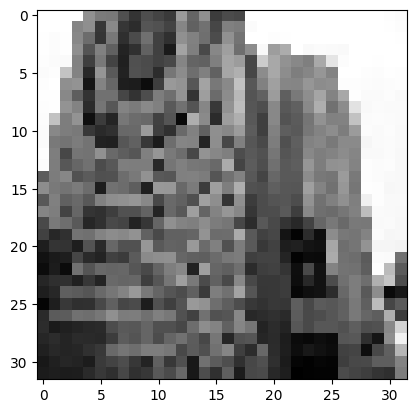

In [111]:
# visualizamr una imagen eligiendo el canal
imagen = X_train[52,:,:,0]  # canal 0 = rojo; canal 1 = verde; canal 2 = azul
plt.imshow(imagen,cmap='gray')
plt.show()

In [112]:
np.isnan(X_train).any() # Comprobar si hay valores nulos en el conjunto de entrenamiento

False

In [113]:
pd.DataFrame(y_train).value_counts() # 6 clases

0        
mountain     2512
glacier      2404
street       2382
sea          2274
forest       2271
buildings    2191
Name: count, dtype: int64

In [114]:
y_train

array(['buildings', 'buildings', 'buildings', ..., 'street', 'street',
       'street'], dtype='<U9')

### Ejercicio 3

Ahora haz un pequeño miniEda y normaliza las features



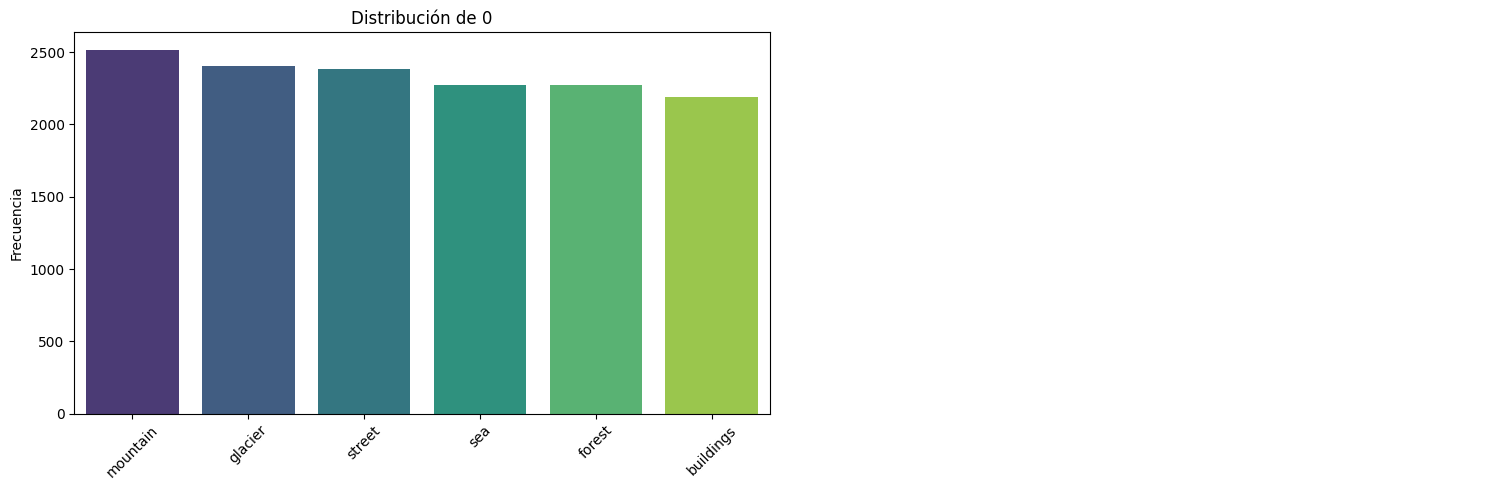

In [115]:
bt.pinta_distribucion_categoricas(pd.DataFrame(y_train), pd.DataFrame(y_train).columns)

In [116]:
# normalización de las imágenes
X_train = X_train / 255.0   # normalizamos los valores de los píxeles entre 0 y 1
X_test = X_test / 255.0

In [117]:
X_test[0,:,:,0]

array([[0.94509804, 0.96078431, 0.95686275, ..., 0.96470588, 0.95686275,
        0.94509804],
       [0.9372549 , 0.93333333, 0.94117647, ..., 0.95686275, 0.94509804,
        0.95686275],
       [0.92156863, 0.92941176, 0.9254902 , ..., 0.94901961, 0.94509804,
        0.94509804],
       ...,
       [0.61960784, 0.63921569, 0.68627451, ..., 0.88627451, 0.85490196,
        0.91372549],
       [0.63921569, 0.58431373, 0.6745098 , ..., 0.86666667, 0.89803922,
        0.81960784],
       [0.89411765, 0.76862745, 0.70980392, ..., 0.88235294, 0.9254902 ,
        0.90588235]])

In [118]:
# transformar y_train e y_test a enteros con LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [119]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [120]:
labels_dict = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}

In [121]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5])

In [122]:
print(y_train.shape)

(14034,)


### Ejercicio 4

Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada. Como guía, copia o parte de la arquitectura del workout (un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer)


In [123]:
X_train.shape[1:]

(32, 32, 3)

In [170]:
model = Sequential()

# primera capa de convolución
model.add(Conv2D(filters=24, kernel_size=(5,5), input_shape=X_train.shape[1:], activation='relu', padding='same')) # nº de features = 24 x 32 x 32 = 24.576; resolución de la imagen = 32 x 32 porque el stride es 1 y padding = same
# primera capa de pooling
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2))) # resolución de la imagen = 16 x 16, nº de features = 16 x 16 x 24 = 6.144
# primera capa de dropout
model.add(Dropout(0.3))
# segunda capa de convolución
model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding='same'))  # nº de features = 16 x 16 x 48 = 12.288; resolución de la imagen = 16 x 16 porque el stride es 1 y padding = same
# segunda capa de pooling
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2))) # resolución de la imagen = 8 x 8, nº de features = 8 x 8 x 48 = 3.072
# segunda capa de dropout
model.add(Dropout(0.3))
# capa de aplanado para entrar en la MLP
model.add(Flatten()) # 8 x 8 x 16 = 1024; 32 x 32 x 3 = 3072
# primera capa de la MLP
model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.3))
# capa de salida
model.add(Dense(units=6, activation='softmax'))

### Ejercicio 5

Escoge el resto de hiperparámetros (optimizador, learning_rate, función de pérdida, métrica,...) y compila el modelo. Muestra un resumen del mismo

In [171]:
# optimizador
optimizer = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999)

#compilar el modelo
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [172]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 48)     │        10,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 8, 8, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,358 (1.55 MB)

 Trainable params: 406,358 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 6

Entrena el modelo reservando un 20% de los datos del entrenamiento para validar y con los callbacks que creas necesarios. NOTA: Ojo, tendrás que preparar un poco los X,y antes.



In [173]:
batch_size = 128
epochs = 30	

# dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train,random_state=42)

In [87]:
np.unique(y_val)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [174]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3202 - loss: 1.6111 - val_accuracy: 0.5169 - val_loss: 1.2391
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5790 - loss: 1.1149 - val_accuracy: 0.5534 - val_loss: 1.1573
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6139 - loss: 1.0048 - val_accuracy: 0.6456 - val_loss: 0.9589
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6559 - loss: 0.9203 - val_accuracy: 0.6732 - val_loss: 0.8936
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6835 - loss: 0.8497 - val_accuracy: 0.6233 - val_loss: 0.9233
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6790 - loss: 0.8575 - val_accuracy: 0.6883 - val_loss: 0.8468
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7057 - loss: 0.8112 - val_accuracy: 0.6803 - val_loss: 0.8567
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7116 - loss: 0.7760 - val_accuracy: 0.6990 - v


### Ejercicio 7

Representa el objeto history y comenta la evolución de tu entrenamiento.



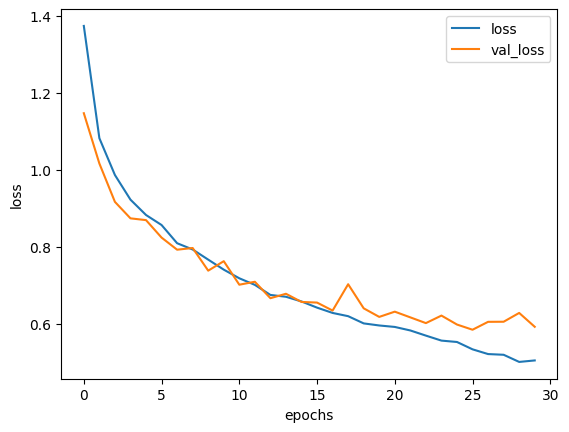

In [128]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

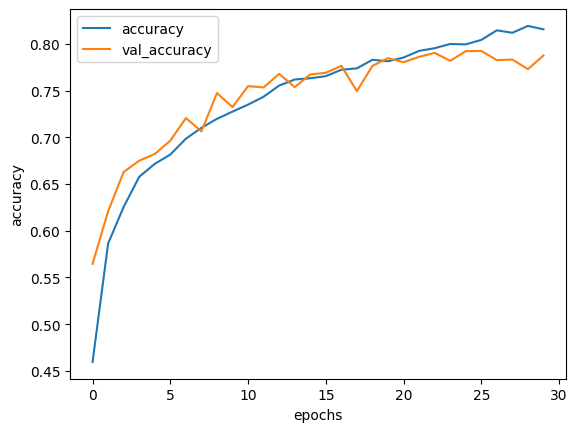

In [90]:

history_df[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");


### Ejercicio 8

Evalua el modelo con los datos de test, además muestra el report de clasificación y la matriz de confusión.



In [91]:
model.evaluate(X_test, y_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7814 - loss: 0.6240


[0.5857481360435486, 0.7946001291275024]

In [130]:
y_pred = [np.argmax(predictions) for predictions in model.predict(X_test)]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       363
           1       0.94      0.87      0.91       474
           2       0.78      0.74      0.76       553
           3       0.80      0.74      0.77       525
           4       0.71      0.83      0.77       510
           5       0.81      0.85      0.83       501

    accuracy                           0.79      2926
   macro avg       0.80      0.79      0.79      2926
weighted avg       0.80      0.79      0.80      2926



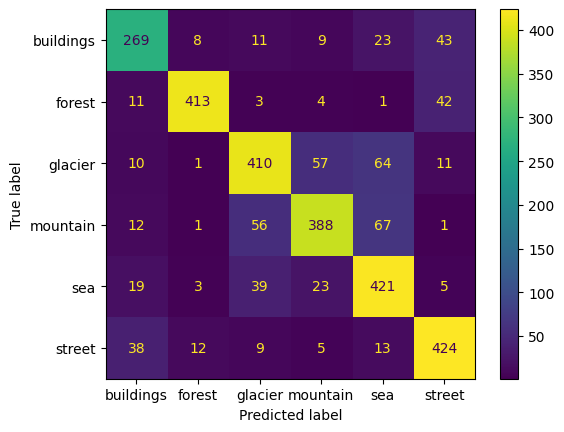

In [129]:
class_names = list(labels_dict.values())

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)


### Ejercicio 9 

Representa algunos de los paisajes donde el modelo comete errores y muestra la confianza que tenía en ellos.





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


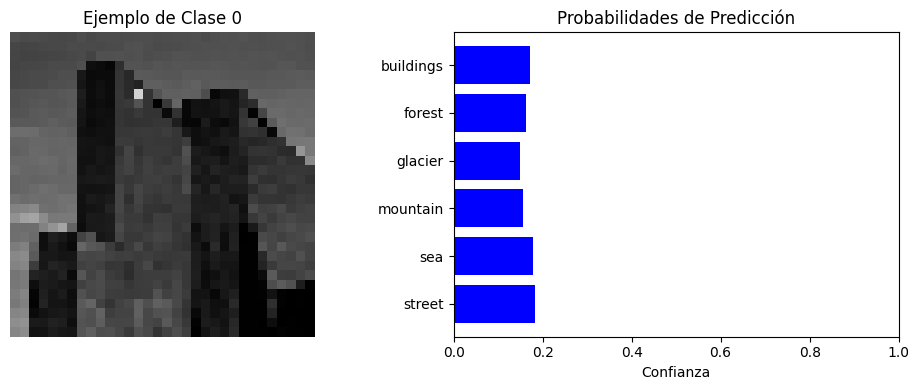

In [160]:
# filtrar una imagen de la clase 0 (buildings)
indices_clase_0 = np.where(y_test == 0)[0]

indice_aleatorio = np.random.choice(indices_clase_0)

imagen = X_test[indice_aleatorio]    

# predecir la clase de la imagen
predictions = model.predict(np.expand_dims(imagen, axis=0))[0]

# Crear la figura
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Mostrar la imagen
axes[0].imshow(imagen)
axes[0].axis("off")
axes[0].set_title(f"Ejemplo de Clase 0")

# Mostrar las probabilidades de predicción en un gráfico de barras
class_names = list(labels_dict.values())  # Obtener nombres de las clases
axes[1].barh(class_names, predictions, color='blue')
axes[1].set_xlim([0, 1])  # Limitar entre 0 y 1
axes[1].set_title("Probabilidades de Predicción")
axes[1].set_xlabel("Confianza")
plt.gca().invert_yaxis()  # Invertir para que la clase con mayor probabilidad aparezca arriba

# Mostrar la figura
plt.tight_layout()
plt.show()


### Ejercicio EXTRA: 

Aumenta la resolución y repite el ejercicio con la misma topología de red

In [ ]:
from keras.layers import UpSampling2D

model_2 = Sequential()

# incrementar la resolución de la imagen antes de la primera convolución (32x32 → 64x64)
model_2.add(UpSampling2D(size=(2,2), input_shape = X_train.shape[1:])) 
# primera capa de convolución
model_2.add(Conv2D(filters=24, kernel_size=(5,5), activation='relu', padding='same', strides=(1,1))) # nº de features = 24 x 64 x 64 = 98.304; resolución de la imagen = 64 x 64; pesos = 24 x 5 x 5 x 3 + 24 = 1.824
# primera capa de pooling
model_2.add(MaxPool2D(pool_size=(2,2), strides = (2,2))) # resolución de la imagen = 32 x 32, nº de features = 32 x 32 x 24 
# primera capa de dropout
model_2.add(Dropout(0.3))


# 🔹 Aumentar resolución antes de la segunda convolución (32x32 → 64x64)
model_2.add(UpSampling2D(size=(2,2))) 
# segunda capa de convolución
model_2.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding='same', strides=(1,1)))  # nº de features = 64 x 64 x 4 = 196.608 ; resolución de la imagen = 64 x 64; pesos = 48 x 3 x 3 x 24 + 48 = 10.416
# segunda capa de pooling
model_2.add(MaxPool2D(pool_size=(2,2), strides = (2,2))) # resolución de la imagen = 32 x 32
# segunda capa de dropout
model_2.add(Dropout(0.3))


# capa de aplanado para entrar en la MLP
model_2.add(Flatten()) # nº de features = 32 x 32 x 48 = 49.152
# primera capa de la MLP
model_2.add(Dense(units=128, activation='relu')) # nº pesos = 49.152 x 128 + 128 = 6.291.456
model_2.add(Dropout(0.3))
# capa de salida
model_2.add(Dense(units=6, activation='softmax'))

In [167]:
#compilar el modelo
model_2.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [168]:
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 64, 64, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 48)     │        10,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32, 32, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,304,598 (24.05 MB)

 Trainable params: 6,304,598 (24.05 MB)

 Non-trainable params: 0 (0.00 B)

In [169]:
# entrenar el modelo
history = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 254ms/step - accuracy: 0.2410 - loss: 2.1602 - val_accuracy: 0.5515 - val_loss: 1.3728
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.4835 - loss: 1.3344 - val_accuracy: 0.6288 - val_loss: 1.0839
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 28s 315ms/step - accuracy: 0.5633 - loss: 1.1335 - val_accuracy: 0.6402 - val_loss: 1.0355
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 287ms/step - accuracy: 0.5874 - loss: 1.0648 - val_accuracy: 0.6487 - val_loss: 0.9557
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 288ms/step - accuracy: 0.6099 - loss: 1.0217 - val_accuracy: 0.6598 - val_loss: 0.9297
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.6152 - loss: 0.9984 - val_accuracy: 0.6872 - val_loss: 0.8844
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step - accuracy: 0.6417 - loss: 0.9307 - val_accuracy: 0.6897 - val_loss: 0.8712
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 26s 293ms/step - accuracy: 0.6475 - loss: 0.9231 - val_accu